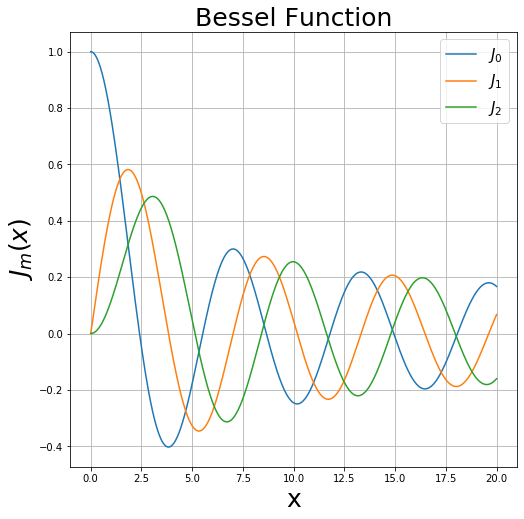

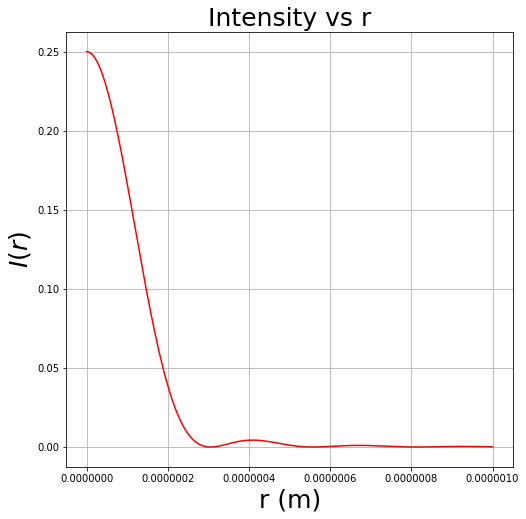

In [215]:
import numpy as np
import pylab as py
from scipy.integrate import simps, trapz

N = 1001 #Number of grid points

def func(theta, m, x):
    return np.cos(m*theta - x * np.sin(theta))

a = 0
b = np.pi
wavelength = 500e-9 
k = 2* np.pi / wavelength

def Bessel(f, m, x, N):
    
    dtheta = (b - a)/(N - 1)

    I = (f(a, m, x) + f(b, m, x))/3.0

    for i in range(1, N - 1, 2):
        theta = a + i*dtheta
        I += 4*f(theta, m, x)/3

    for i in range(2, N - 1, 2):
        theta = a + i*dtheta
        I += 2*f(theta, m, x)/3

    I *= dtheta
    I =  I / np.pi
    return(I)

fig1 = py.figure(figsize=(8,8));

x = np.linspace(0, 20, N)
py.plot(x, Bessel(func, 0, x, N), label ='$J_0$')
py.plot(x, Bessel(func, 1, x, N), label ='$J_1$')
py.plot(x, Bessel(func, 2, x, N), label ='$J_2$')

py.title('Bessel Function', fontsize=25)
py.grid() #turns grid on the graph on 
py.xlabel('x', fontsize = 25)
py.ylabel('$J_m(x)$', fontsize = 25)
py.legend(loc='best',fontsize = 15)
py.rcParams.update({'font.size': 10})
    
    
def intensity(k, r):
    iny = (Bessel(func, 1, k*r, N)/(k*r))**2
    return iny 

r = np.linspace(1e-12, 1e-6, N)

fig2 = py.figure(figsize=(8,8));
py.plot(r, intensity(k,r), color ='red') #This is scaled by 1e**6 so the graph looks better

py.title('Intensity vs r', fontsize=25)
py.xlabel('r (m)', fontsize = 25)
py.ylabel('$I(r)$', fontsize = 25)
py.grid() #turns grid on the graph on 

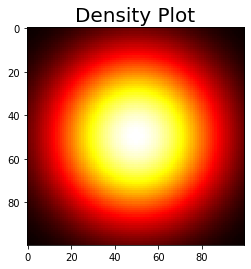

In [212]:
M = 50

Den_A = np.zeros([2*M, 2*M])

x2 = np.linspace(-0.2 * 1e-6, 0.2 * 1e-6, 2 * M)
y2 = np.linspace(-0.2 * 1e-6, 0.2 * 1e-6, 2 * M)

for i in range(2 * M):
    for j in range(2 * M):
        r2 = np.sqrt(x2[i] **2 + y2[j]**2)
        Den_A[i,j] = intensity(k, r2)

py.title('Density Plot', fontsize=20)
py.imshow(Den_A, 'hot')

TypeError: Intensity() missing 1 required positional argument: 'r'

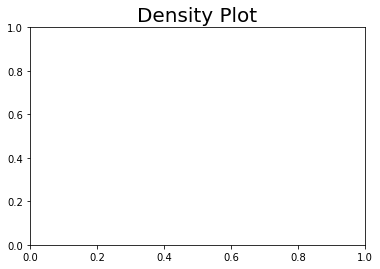

In [230]:
#Extra Credit Attempt 

M = 50

Den_A = np.zeros([2*M, 2*M])
R3 = np.zeros([2*M, 2*M])

x2 = np.linspace(-0.2 * 1e-6, 0.2 * 1e-6, 2 * M)
y2 = np.linspace(-0.2 * 1e-6, 0.2 * 1e-6, 2 * M)


for i in range(2 * M):
    for j in range(2 * M):
        r2 = np.sqrt(x2[i] **2 + y2[j]**2)
        R3[i][j] = r2

     
    
py.title('Density Plot', fontsize=20)
py.imshow(Intensity(k, R3), 'hot')